In [106]:
# Import required libraries
import numpy as np # import numpy 
import pandas as pd # import pandas for dataframe operaions

# Import below libraries for plots and graphs
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy as sp

# Import SKLearn and statsmodels libraries for building the linear regression model
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

# Import RFE and LineaerRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore') # This is to ignore any warnings

### Read the data

In [107]:
daydata = pd.read_csv('day.csv')
daydata.info()

# All are non- null rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


In [108]:
# Let us look at first few records
daydata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [109]:
# Check if Row data being null
len(daydata[daydata.isnull().sum(axis=1) > 1].index)

0

### Data cleaning
Drop below columns:
- instant: as it is an index column
- dteday: date (We have month and year in separate columns)
- casual and registered: as cnt has the total of it and we will analyze with cnt

In [110]:
daydata = daydata.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1)

In [111]:
daydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(8)
memory usage: 68.5 KB


In [112]:
daydata.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


#### Visualizing the variables

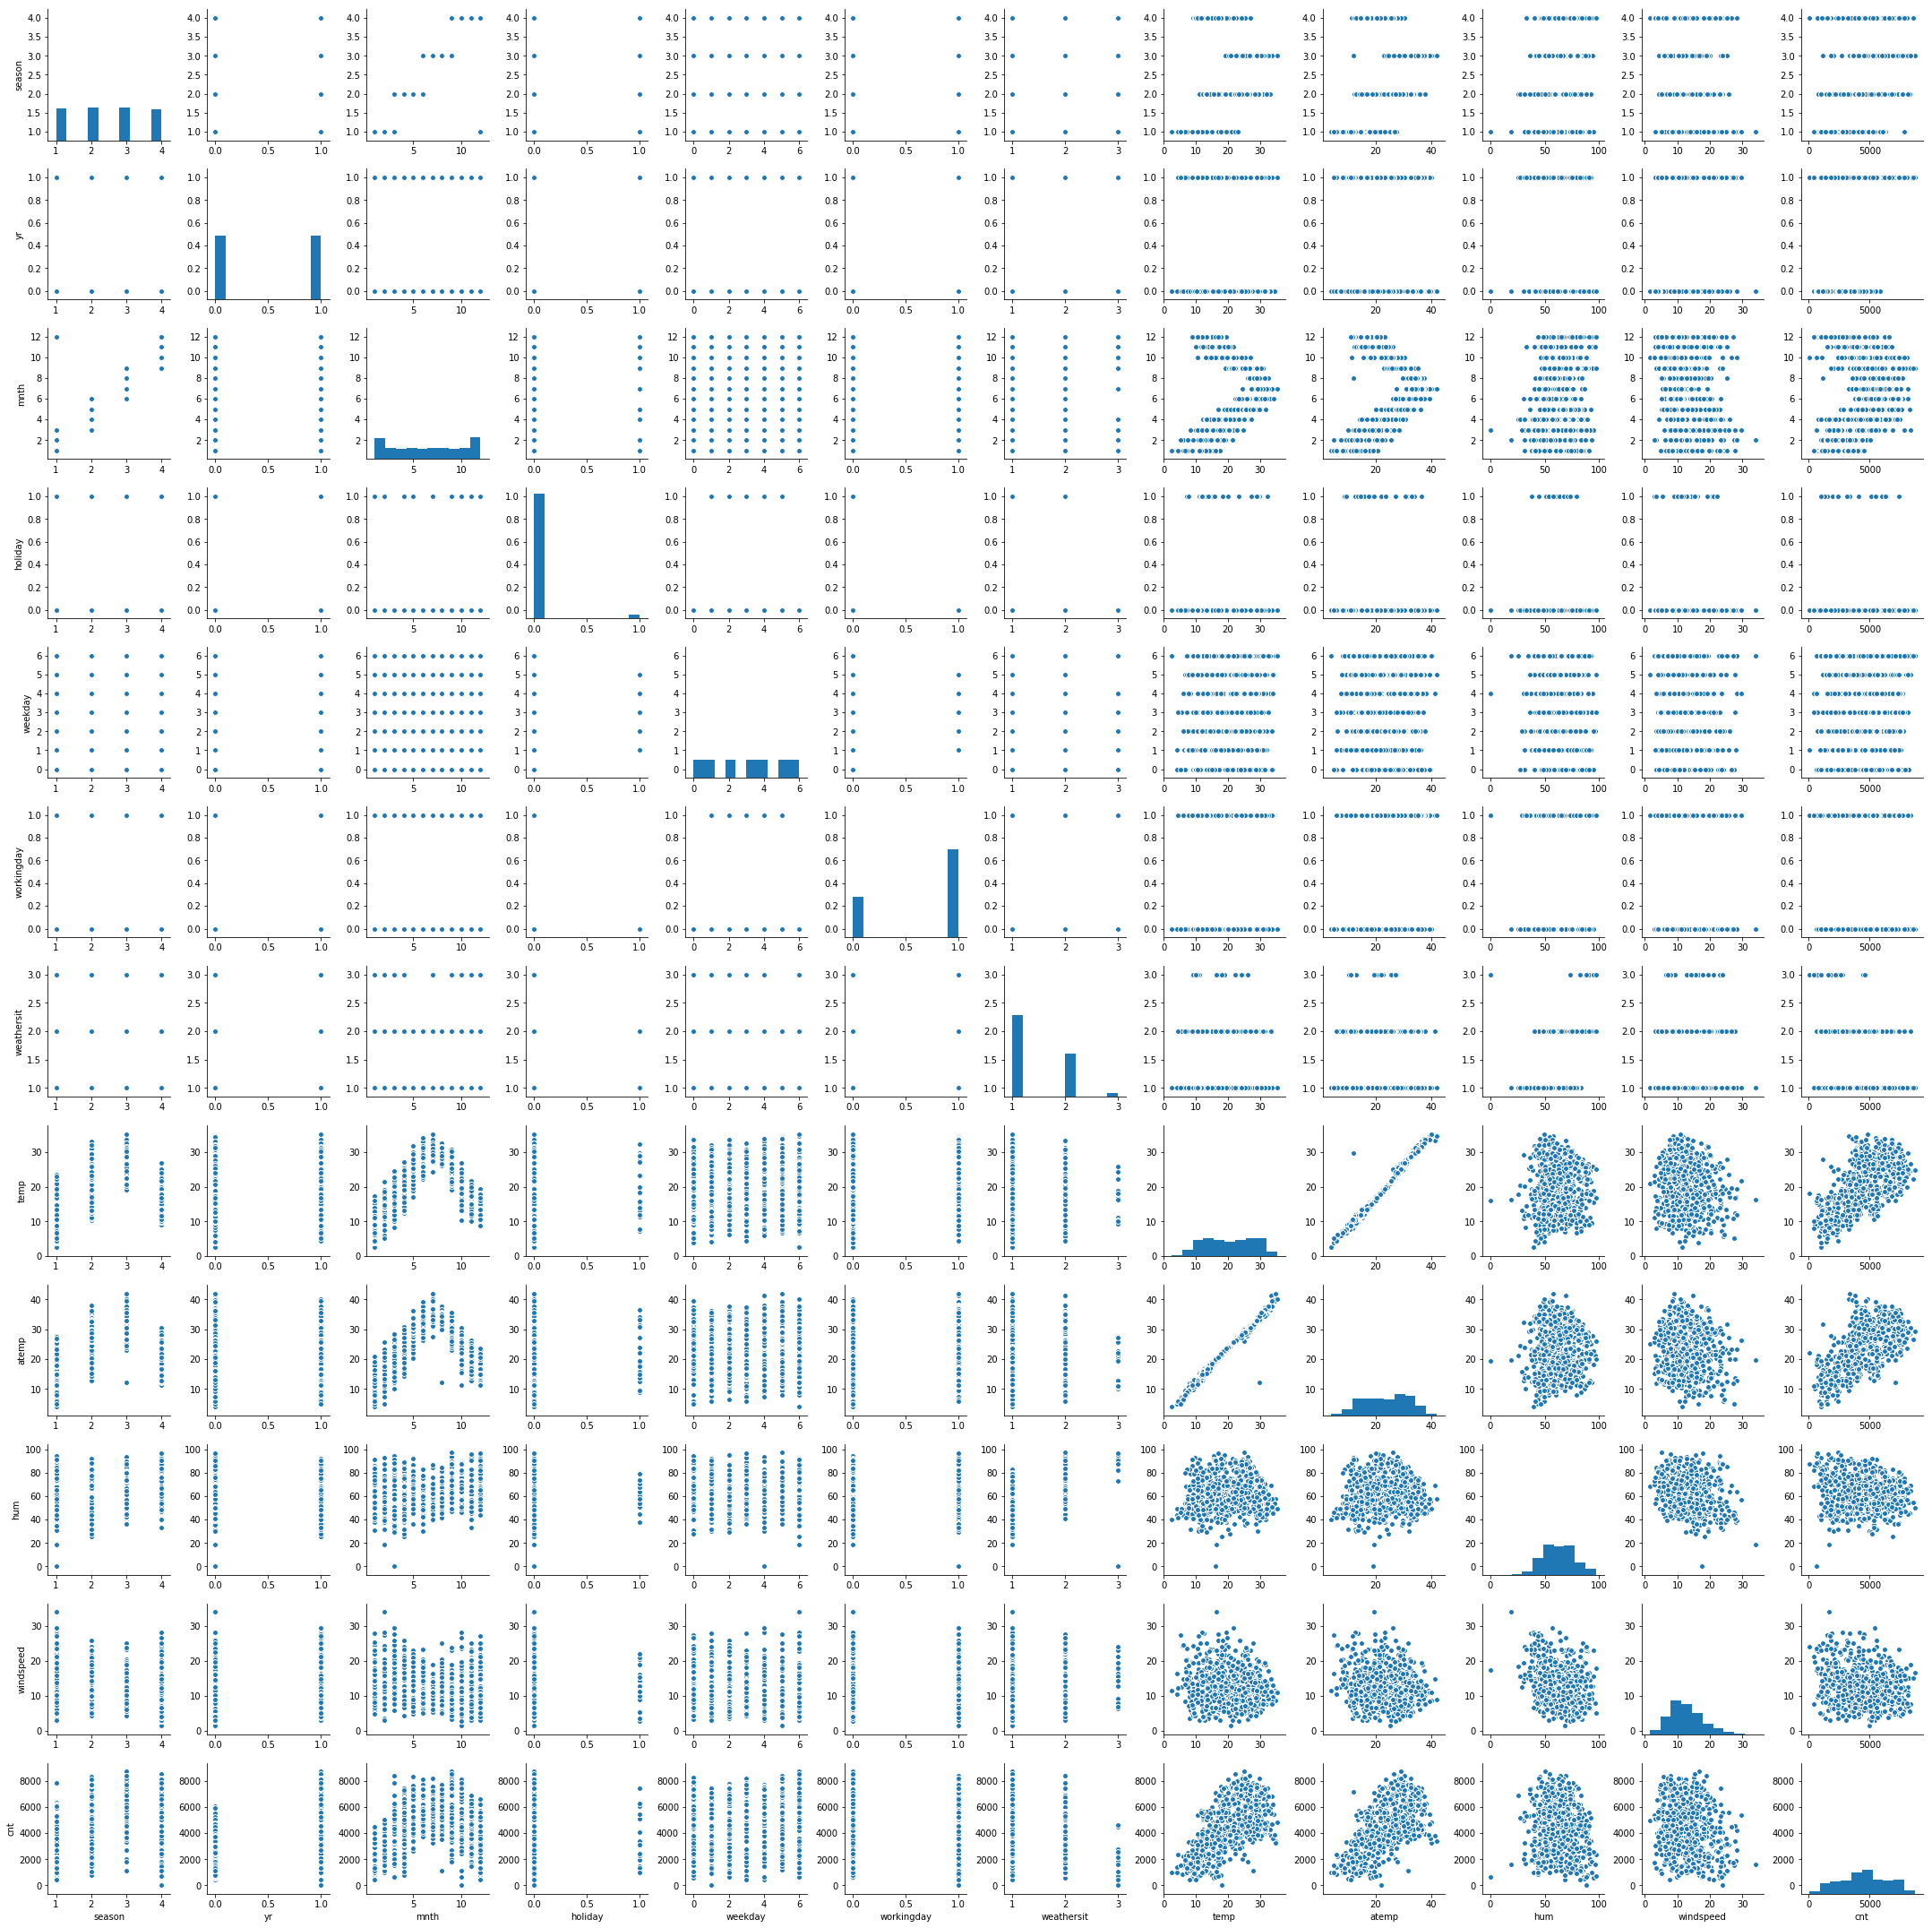

In [113]:
sns.pairplot(daydata)
plt.show()

### Visualizing the Categorical variables

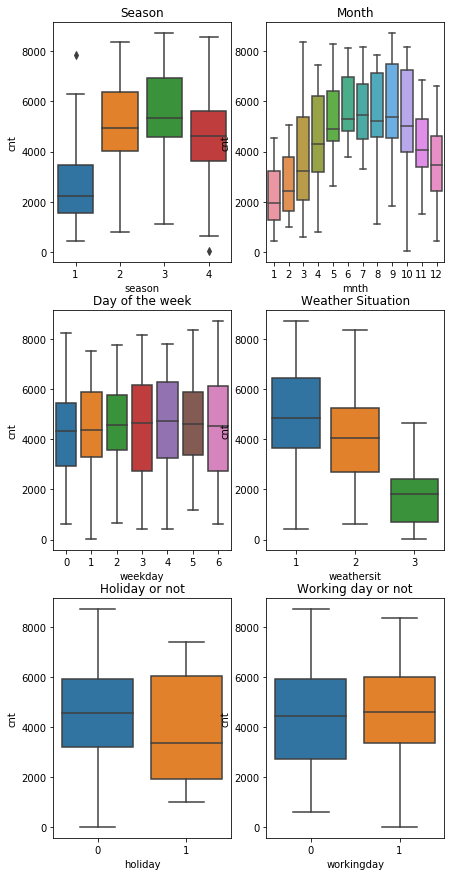

In [114]:
plt.figure(figsize =(7, 15))
plt.subplot(3, 2, 1)
sns.boxplot(x = 'season', y = 'cnt', data=daydata).set(title='Season')

plt.subplot(3, 2, 2)
sns.boxplot(x = 'mnth', y = 'cnt', data=daydata).set(title='Month')

plt.subplot(3, 2, 3)
sns.boxplot(x = 'weekday', y = 'cnt', data=daydata).set(title='Day of the week')

plt.subplot(3, 2, 4)
sns.boxplot(x = 'weathersit', y = 'cnt', data=daydata).set(title='Weather Situation')

plt.subplot(3, 2, 5)
sns.boxplot(x = 'holiday', y = 'cnt', data=daydata).set(title='Holiday or not')

plt.subplot(3, 2, 6)
sns.boxplot(x = 'workingday', y = 'cnt', data=daydata).set(title='Working day or not')
plt.show()

## Dummy Variables

Creating Dummy variables for only four categorical variables season, weathersit, mnth and weekday. Holiday and workingday are like flag variables


Dummy variables for Season column
1. Season (1:spring) when Season_summer=0, Season_rain=0, Season_winter=0
2. Season (2:summer) when Season_summer=1, Season_rain=0, Season_winter=0 indicated by Season_summer
3. Season (3:fall) when Season_summer=0, Season_rain=1, Season_winter=0 indicated by Season_rain
4. Season (4:winter) when Season_summer = 0, Season_rain=0, Season_winter=1 indicated by Season_winter

In [115]:
# Creating dummy variables for season
season = pd.get_dummies(daydata['season'], drop_first = True)
season.rename(columns={season.columns[0]: 'Season_summer', season.columns[1]: 'Season_rain', season.columns[2]: 'Season_winter'},inplace=True)
daydata = pd.concat([daydata, season], axis = 1)
daydata = daydata.drop('season', axis = 1)


weathersit: 

		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

There is no data for value 4, we only have values 1,2 and 3. Hence 2 dummy variables are created.
- 0,0 indicates Cleas weather
- 1,0 indicates Mist + Cloudy represented by Weather_Mist
- 0,1 indicates low rain represented by Weather_Rain


In [116]:
daydata['weathersit']=daydata['weathersit'].astype('category')
daydata = pd.get_dummies(daydata, drop_first=True)
daydata.rename(columns={'weathersit_2': 'Weather_Mist', 'weathersit_3': 'Weather_Rain'},inplace=True)

- mnth : month ( 1 to 12)

categorised into mnth_1 through mnth_12

In [117]:
daydata['mnth']=daydata['mnth'].astype('category')
daydata = pd.get_dummies(daydata, drop_first=True)

In [118]:
daydata['weekday']=daydata['weekday'].astype('category')
daydata = pd.get_dummies(daydata, drop_first=True)
daydata.rename(columns={'weekday_0': 'Tuesday', 'weekday_1': 'Wednesday','weekday_2':'Thursday','weekday_3':'Friday','weekday_4':'Saturday','weekday_5':'Sunday','weekday_6':'Monday'},inplace=True)

- yr : year (0: 2018, 1:2019)

Rename as year_19 [value '0 indicates 2018 and value '1' indicates 2019

Rename atemp as feeling_temp

Rename hum as humidity

In [119]:
daydata.rename(columns={'yr': 'year_19', 'atemp': 'feeling_temp', 'hum': 'humidity'},inplace=True)

In [120]:
daydata.columns

Index(['year_19', 'holiday', 'workingday', 'temp', 'feeling_temp', 'humidity',
       'windspeed', 'cnt', 'Season_summer', 'Season_rain', 'Season_winter',
       'Weather_Mist', 'Weather_Rain', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday'],
      dtype='object')

### Splitting into train-test data set

In [121]:
df_train, df_test = train_test_split(daydata, train_size = 0.70, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [122]:
daydata.head()

,year_19,holiday,workingday,temp,feeling_temp,humidity,windspeed,cnt,Season_summer,Season_rain,...,mnth_9,mnth_10,mnth_11,mnth_12,Wednesday,Thursday,Friday,Saturday,Sunday,Monday
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,1,0,0,0


#### Using MinMax scaling

In [123]:
# Instantiate an object
scaler = MinMaxScaler()

# Create a list of only numeric variables
num_vars = ['temp', 'feeling_temp', 'humidity','windspeed', 'cnt']

### fit on the data

In [124]:
# Fit on the data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,year_19,holiday,workingday,temp,feeling_temp,humidity,windspeed,cnt,Season_summer,Season_rain,...,mnth_9,mnth_10,mnth_11,mnth_12,Wednesday,Thursday,Friday,Saturday,Sunday,Monday
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,1,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df_train.describe()

,year_19,holiday,workingday,temp,feeling_temp,humidity,windspeed,cnt,Season_summer,Season_rain,...,mnth_9,mnth_10,mnth_11,mnth_12,Wednesday,Thursday,Friday,Saturday,Sunday,Monday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.247059,0.262745,...,0.080392,0.084314,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.431725,0.440557,...,0.272166,0.278131,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Training the model

In [ ]:
# Draw a heatmap
plt.figure(figsize = (25, 15))
sns.heatmap(df_train.corr(), annot = True, cmap='Purples_r')
plt.show()

In [ ]:
# For training, create X_train and y_train from df_train

y_train = df_train.pop('cnt')
X_train = df_train

In [ ]:
X_train.head()

## Building our Model

##### Usinf RFE (Recursive Feature Elimination)

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [ ]:
col = X_train.columns[rfe.support_]
col

In [ ]:
# Columns which RFE says that are not useful
X_train.columns[~rfe.support_]

### Building the model with RFE selected columns

In [ ]:
X_train_rfe = X_train[col]

In [ ]:
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [ ]:
# Running the Linear model
lm = sm.OLS(y_train, X_train_rfe).fit()

In [ ]:
print(lm.summary())

In [ ]:
# look at the significance of variables and then drop few variables, one variable at at time
# another approach is VIF - how multicollinear is the variable with all other variables

### Checking VIF
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model.

The formula for calculating VIF is:

VIFi = 1/(1-Ri^2)

In [ ]:
# Creating a data frame that contains names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

We could have:
- High p-value, high VIF - Remove these variables
- High - Low: => Difficult to judge
    - High p-value, low VIF  ==> Remove these type of variables first
    - Low p-value, high VIF  ==> Remove these after the ones above
- Low p-value, low VIF (Keep these variables)

##### Model 1

In [ ]:
# Drop Season_rain
X_train_new = X_train_rfe.drop('Season_rain', axis=1)

In [ ]:
# Add constant
X_train_lm = sm.add_constant(X_train_new)

In [ ]:
# Running the Linear Model
lm = sm.OLS(y_train, X_train_lm).fit()

##### We can note that p-value of this model is less than 0.05 and VIF values for all the features is less than 5. This model is stable with 84.8% R-Squared.

In [ ]:
print(lm.summary())

In [ ]:
# Creating a data frame that contains names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

In [ ]:
X_train_new.columns

In [ ]:
X_train_new = X_train_new.drop(['const'], axis = 1)

### Residual Analysis

In [ ]:
X_train_lm.info()

In [ ]:
# Residual is the actual y_train minus predected values of y.

y_train_pred = lm.predict(X_train_lm)
y_train_pred.head()

In [ ]:
# Evaluate the model
r2_score(y_true=y_train, y_pred=y_train_pred)

#### Residual

In [ ]:
# Residual
res = y_train - y_train_pred

## Assumptions

### Linear Relationship between the features and the target

- Linear relationship exists with 'temp' feature

In [ ]:
# There is a Linear relationship between temp and target variable cnt
plt.plot(X_train_lm['temp'], y_train_pred, 'o', color='black');
plt.title("Linear Relationship Exists")
plt.show()

### Little or no Multicollinearity between the features

- We can note that there are no multi collinearity

In [ ]:
# Draw a heatmap
mask = np.array(df_train.corr())
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(25,25)
sns.heatmap(df_train.corr(), mask=mask,vmax=.8, square=True,annot=True)
plt.show()

### Homoscedasticity Assumption

- We are unable to findout any pattern with the noise, hence it is a Homoscedasticity

In [ ]:
fig, ax = plt.subplots(figsize=(5,2.5))
_ = ax.scatter(y_train_pred, res)
plt.show()

### Error terms are normally distributed with mean zero

##### Residual plot

- We can notice almost normal distribution with residuals

In [ ]:

sns.distplot(res)
plt.show()

# We can note that residual plot is almost normal distribution

### Variables follow a Normal Distribution

We can notice almost normal distribution on the q-q plot 

In [ ]:
fig, ax = plt.subplots(figsize=(5,2.5))
_, (__, ___, r) = sp.stats.probplot(res, plot=ax, fit=True)
plt.show()

In [ ]:
plt.figure(10)
acf = smt.graphics.plot_acf(res, lags=40 , alpha=0.05)
acf.show()
plt.show()

## Prediction and Evaluation on test set

In [ ]:
# fit() - we fit on the training data set and never fit on the test data set
# transform() - use test data set

In [ ]:
# Create a list of only numeric variables
num_vars = ['temp', 'feeling_temp', 'humidity','windspeed', 'cnt']

# transform on the test data set
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

In [ ]:
df_test.describe()

In [ ]:
y_test = df_test.pop('cnt')
X_test = df_test

In [ ]:
X_test.columns

In [ ]:
X_train_new.columns

In [ ]:
# Now let us use our model to make predictions

# Creating X_test_new data frame by dropping values from X_test
X_test_new = X_test.drop(['feeling_temp','Season_rain','mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_7','mnth_11', 'mnth_12',
       'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], axis = 1)

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)


In [ ]:
X_test_new.columns

In [ ]:
# Make predictions
y_test_pred = lm.predict(X_test_new)

In [ ]:
# Evaluate the model
r2_score(y_true=y_test, y_pred=y_test_pred)

### Model Evaluation

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure(10)
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)   # Plot heading
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)
plt.show()

In [ ]:
# Residual
res_test = y_test - y_test_pred
sns.distplot(res_test)
plt.show()

# We can notice that residual plot of TEST is similar to that of Train

In [ ]:
fig, ax = plt.subplots(figsize=(5,2.5))
_, (__, ___, r) = sp.stats.probplot(res_test, plot=ax, fit=True)
plt.show()

# We can notice that q-q plot of TEST is similar to that of TRAIN data

### Results

The model is good. 
- R-Square is 84%, 
- F-Statistic is 196. 
- We can note that p-value for all the variables selected in the model is less than 0.05 which indicates the model is good. 
- We have also noted that VIF is less than 5 for the variables.

#### R2 Score for TRAIN set = 84.8%
#### R2 Score for TEST set = 81.5%

In [ ]:
lm.summary()

#### cnt = 0.1948 + (year_19 X 0.2292) - (holiday X 0.0557) + (workingday X 0.0442) + (temp X 0.5309) - (humidity X 0.1708) - (windspeed X 0.1858) + (Season_summer X 0.1049) + (Season_winter X 0.1349) - (Weather_Mist X 0.0568) - (Weather_Rain X 0.2470) + (mnth_8 X 0.0557) + (mnth_9 X 0.1252) + (mnth_10 X 0.0385) + (Monday X 0.0527)

- temp: The bike demand in BoomBikes increases by 0.5309 times when there is raise in temperature.

- year_19: In the year 2019, there has been an increase in demany in BoomBikes by a ratio of 0.2292 when compared to 2018. As the years increases, the demand will also increase

-- Season based comparison

- Season_winter: The demand for Bike sharing is high in winter by 0.1349 times
- Season_summer: Summer season takes second place to see the demand and we see a raise by 0.1049 times

-- Month wise comparison

- mnth_9: The September month will see raise in demand of the bike sharing in BoomBikes by 0.1252 times
- mnth_8: August takes second place to see the demand by 0.0557 times
- mnth_10: October will be in third position when we compare the demand by month wise and the coefficient is 0.0385 times

-- Working day versus Holiday

- workingday: We see an increase in demand for the bikes on BoomBikes when it is a Working day by 0.0442 times
- holiday: Whereas if it is a holiday, we see drop in bike sharing demand in BoomBikes by 0.0557 times

-- Weather conditions

- Weather_Mist: When there is mild rain or mist with cloudy climate, we see drop in demand of the bikes by 0.0568 as the corefficient is negative
- Weather_Rain: We see that people do not like to share bikes when it is raining and this is indicated by negative coefficient of value -0.2470

- humidity: As the humidity increases, the demand for bike sharing falls down by 0.1708 times
- windspeed: As the wind speed increases, or on a windy day, we see dip in bike sharing demand. This is indicated by coefficient value of -0.1858

